<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Color-Images" data-toc-modified-id="Modeling-Color-Images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Color Images</a></span></li><li><span><a href="#Stacked-Model" data-toc-modified-id="Stacked-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stacked Model</a></span><ul class="toc-item"><li><span><a href="#Model-1" data-toc-modified-id="Model-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model 4</a></span></li><li><span><a href="#Model-5-Image-Augmentation" data-toc-modified-id="Model-5-Image-Augmentation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Model 5 Image Augmentation</a></span></li><li><span><a href="#Model-6-Transfer-Learning" data-toc-modified-id="Model-6-Transfer-Learning-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Model 6 Transfer Learning</a></span></li></ul></li><li><span><a href="#Grayscale-Model" data-toc-modified-id="Grayscale-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Grayscale Model</a></span></li><li><span><a href="#Binary-Model" data-toc-modified-id="Binary-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Binary Model</a></span></li><li><span><a href="#Canny-Edges-Model" data-toc-modified-id="Canny-Edges-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Canny Edges Model</a></span></li></ul></div>

In [2]:
import numpy as np
import os
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Flatten

In [2]:
#https://www.tensorflow.org/tutorials/load_data/images
dataset_url = "data"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='corn_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

# Modeling Color Images

In [7]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 180

In [9]:
#creating training set of raw images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [10]:
#creating validation set of raw images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [11]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 76s 715ms/step - loss: 0.8504 - accuracy: 0.6293 - val_loss: 0.4507 - val_accuracy: 0.7945
Epoch 2/10
105/105 [==============================] - 63s 601ms/step - loss: 0.4299 - accuracy: 0.8265 - val_loss: 0.3809 - val_accuracy: 0.8172
Epoch 3/10
105/105 [==============================] - 61s 579ms/step - loss: 0.3319 - accuracy: 0.8700 - val_loss: 0.3618 - val_accuracy: 0.8459
Epoch 4/10
105/105 [==============================] - 62s 592ms/step - loss: 0.2751 - accuracy: 0.8855 - val_loss: 0.3168 - val_accuracy: 0.8626
Epoch 5/10
105/105 [==============================] - 62s 587ms/step - loss: 0.2230 - accuracy: 0.9087 - val_loss: 0.3594 - val_accuracy: 0.8590
Epoch 6/10
105/105 [==============================] - 63s 600ms/step - loss: 0.1752 - accuracy: 0.9317 - val_loss: 0.3359 - val_accuracy: 0.8638
Epoch 7/10
105/105 [==============================] - 61s 585ms/step - loss: 0.1452 - accuracy: 0.9447 - val_loss: 0.3562 - val_ac

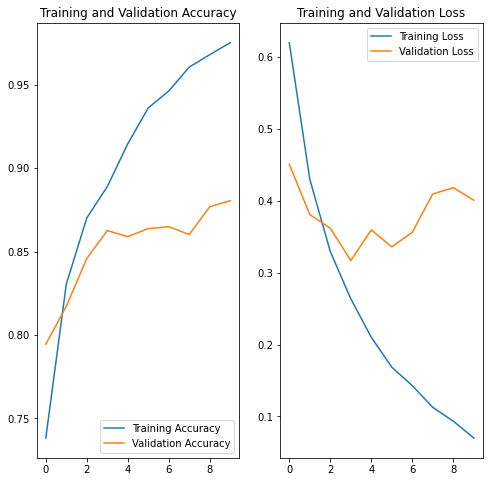

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
#Adding dropout of 0.2 of training data to help prevent overfitting.
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
105/105 [==============================] - 49s 462ms/step - loss: 1.1093 - accuracy: 0.5696 - val_loss: 0.4886 - val_accuracy: 0.7873
Epoch 2/15
105/105 [==============================] - 52s 495ms/step - loss: 0.4515 - accuracy: 0.8168 - val_loss: 0.3520 - val_accuracy: 0.8303
Epoch 3/15
105/105 [==============================] - 51s 488ms/step - loss: 0.3460 - accuracy: 0.8525 - val_loss: 0.3085 - val_accuracy: 0.8638
Epoch 4/15
105/105 [==============================] - 53s 501ms/step - loss: 0.2792 - accuracy: 0.8830 - val_loss: 0.3632 - val_accuracy: 0.8507
Epoch 5/15
105/105 [==============================] - 52s 500ms/step - loss: 0.2327 - accuracy: 0.9078 - val_loss: 0.3040 - val_accuracy: 0.8734
Epoch 6/15
105/105 [==============================] - 55s 522ms/step - loss: 0.1829 - accuracy: 0.9291 - val_loss: 0.3492 - val_accuracy: 0.8817
Epoch 7/15
105/105 [==============================] - 52s 493ms/step - loss: 0.1822 - accuracy: 0.9294 - val_loss: 0.3838 - val_ac

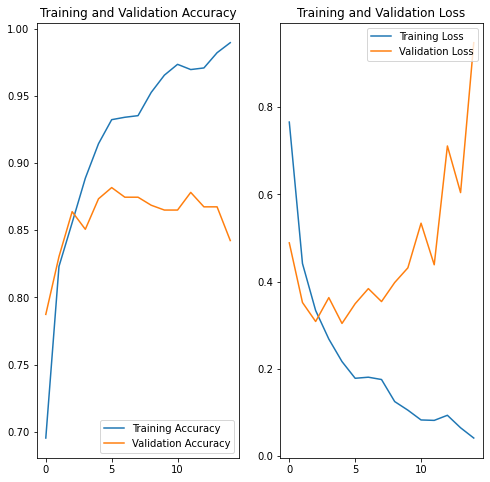

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Stacked Model

In [3]:
#https://www.tensorflow.org/tutorials/load_data/images
dataset_url = 'stacked'

#data_dir = pathlib.Path(data_dir)

In [4]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 1260

In [5]:
#creating training set of raw images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [6]:
#creating validation set of raw images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [7]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model 1

In [28]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
epochs=15
#early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
105/105 [==============================] - 492s 5s/step - loss: 1.0862 - accuracy: 0.5870 - val_loss: 0.2806 - val_accuracy: 0.9020
Epoch 2/15
105/105 [==============================] - 504s 5s/step - loss: 0.1956 - accuracy: 0.9413 - val_loss: 0.1777 - val_accuracy: 0.9355
Epoch 3/15
105/105 [==============================] - 484s 5s/step - loss: 0.0746 - accuracy: 0.9785 - val_loss: 0.1676 - val_accuracy: 0.9582
Epoch 4/15
105/105 [==============================] - 466s 4s/step - loss: 0.0714 - accuracy: 0.9709 - val_loss: 0.1455 - val_accuracy: 0.9630
Epoch 5/15
105/105 [==============================] - 481s 5s/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.2156 - val_accuracy: 0.9522
Epoch 6/15
105/105 [==============================] - 483s 5s/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.2880 - val_accuracy: 0.9283
Epoch 7/15
105/105 [==============================] - 509s 5s/step - loss: 0.0101 - accuracy: 0.9960 - val_loss: 0.1902 - val_accuracy: 0.9510

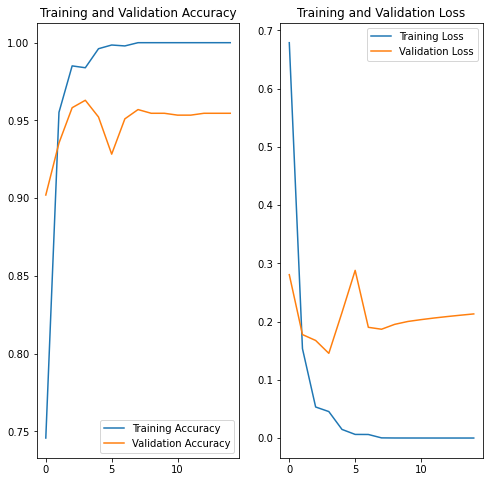

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 1260, 3)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 1258, 32)     896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 629, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 87, 627, 32)       9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 313, 32)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 41, 311, 32)       9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 20, 155, 32)      

## Model 2

In [33]:
num_classes = 4

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, activation='relu'),
#  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs=15
#early_stopping_monitor = EarlyStopping(patience=3)
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
105/105 [==============================] - 435s 4s/step - loss: 2.2688 - accuracy: 0.5520 - val_loss: 0.1738 - val_accuracy: 0.9343
Epoch 2/15
105/105 [==============================] - 450s 4s/step - loss: 0.1255 - accuracy: 0.9544 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 3/15
105/105 [==============================] - 438s 4s/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.3375 - val_accuracy: 0.9056
Epoch 4/15
105/105 [==============================] - 432s 4s/step - loss: 0.0255 - accuracy: 0.9936 - val_loss: 0.1486 - val_accuracy: 0.9474
Epoch 5/15
105/105 [==============================] - 433s 4s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1606 - val_accuracy: 0.9558
Epoch 6/15
105/105 [==============================] - 433s 4s/step - loss: 2.1221e-04 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 0.9546
Epoch 7/15
105/105 [==============================] - 433s 4s/step - loss: 1.3056e-04 - accuracy: 1.0000 - val_loss: 0.1692 - val_accuracy

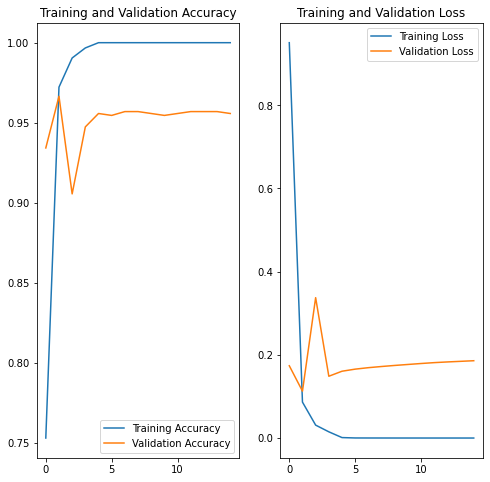

In [36]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [37]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 1260, 3)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 1258, 32)     896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 629, 32)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 627, 32)       9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 313, 32)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 430688)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

## Model 3

In [38]:
num_classes = 4

model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs=10
#early_stopping_monitor = EarlyStopping(patience=3)
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 458s 4s/step - loss: 0.9909 - accuracy: 0.5957 - val_loss: 0.2357 - val_accuracy: 0.9211
Epoch 2/10
105/105 [==============================] - 451s 4s/step - loss: 0.1818 - accuracy: 0.9357 - val_loss: 0.2036 - val_accuracy: 0.9307
Epoch 3/10
105/105 [==============================] - 452s 4s/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.2031 - val_accuracy: 0.9295
Epoch 4/10
105/105 [==============================] - 450s 4s/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.1908 - val_accuracy: 0.9403
Epoch 5/10
105/105 [==============================] - 452s 4s/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.2198 - val_accuracy: 0.9462
Epoch 6/10
105/105 [==============================] - 448s 4s/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.2755 - val_accuracy: 0.9355
Epoch 7/10
105/105 [==============================] - 453s 4s/step - loss: 0.0103 - accuracy: 0.9960 - val_loss: 0.3146 - val_accuracy: 0.9247

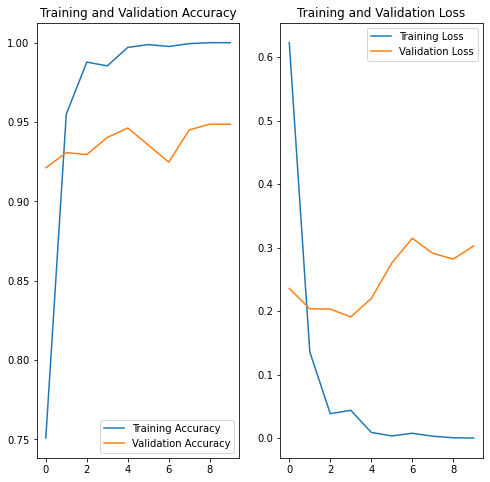

In [42]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [43]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 1260, 3)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 178, 1258, 32)     896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 89, 629, 32)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 87, 627, 32)       9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 313, 32)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 41, 311, 32)       9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 155, 32)      

## Model 4

In [13]:
num_classes = 4

model4 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, activation='relu'),
#  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
#early_stopping_monitor = EarlyStopping(patience=3)
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 492s 5s/step - loss: 2.9536 - accuracy: 0.6163 - val_loss: 0.1626 - val_accuracy: 0.9427
Epoch 2/10
105/105 [==============================] - 471s 4s/step - loss: 0.1064 - accuracy: 0.9654 - val_loss: 0.2530 - val_accuracy: 0.9080
Epoch 3/10
105/105 [==============================] - 488s 5s/step - loss: 0.0216 - accuracy: 0.9921 - val_loss: 0.1177 - val_accuracy: 0.9654
Epoch 4/10
105/105 [==============================] - 475s 5s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1552 - val_accuracy: 0.9594
Epoch 5/10
105/105 [==============================] - 476s 5s/step - loss: 3.6464e-04 - accuracy: 1.0000 - val_loss: 0.1499 - val_accuracy: 0.9618
Epoch 6/10
105/105 [==============================] - 474s 5s/step - loss: 7.4190e-05 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy: 0.9570
Epoch 7/10
105/105 [==============================] - 474s 5s/step - loss: 4.4826e-05 - accuracy: 1.0000 - val_loss: 0.1503 - val_accu

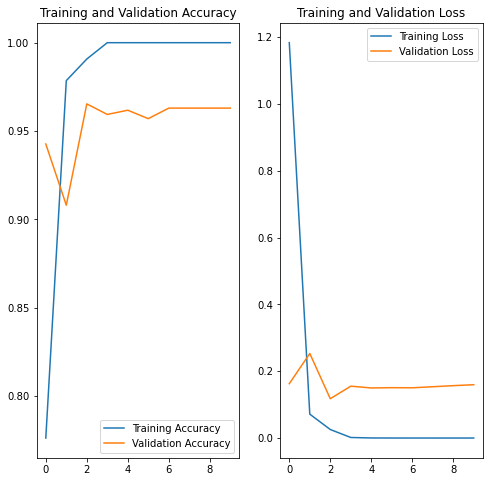

In [16]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [17]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 1260, 3)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 1258, 32)     896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 629, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 627, 32)       9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 313, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 430688)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

## Model 5 Image Augmentation

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")])

In [23]:
num_classes = 4

model5 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, activation='relu'),
#  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
epochs=15
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
105/105 [==============================] - 506s 5s/step - loss: 1.8133 - accuracy: 0.5047 - val_loss: 0.3945 - val_accuracy: 0.8566
Epoch 2/15
105/105 [==============================] - 475s 5s/step - loss: 0.2703 - accuracy: 0.9087 - val_loss: 0.2243 - val_accuracy: 0.9259
Epoch 3/15
105/105 [==============================] - 457s 4s/step - loss: 0.1442 - accuracy: 0.9554 - val_loss: 0.2382 - val_accuracy: 0.9355
Epoch 4/15
105/105 [==============================] - 459s 4s/step - loss: 0.0985 - accuracy: 0.9693 - val_loss: 0.2008 - val_accuracy: 0.9498
Epoch 5/15
105/105 [==============================] - 530s 5s/step - loss: 0.1016 - accuracy: 0.9682 - val_loss: 0.1723 - val_accuracy: 0.9522
Epoch 6/15
105/105 [==============================] - 457s 4s/step - loss: 0.0611 - accuracy: 0.9833 - val_loss: 0.1591 - val_accuracy: 0.9558
Epoch 7/15
105/105 [==============================] - 459s 4s/step - loss: 0.0600 - accuracy: 0.9838 - val_loss: 0.1429 - val_accuracy: 0.9486

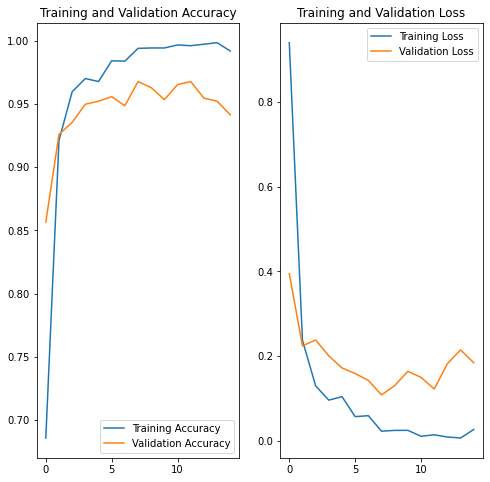

In [26]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 1260, 3)      0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 180, 1260, 3)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 178, 1258, 32)     896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 89, 629, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 87, 627, 32)       9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 43, 313, 32)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 430688)           

## Model 6 Transfer Learning

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16

In [10]:
# load model
model6 = VGG16(include_top=False, input_shape=(180, 1260, 3))

for layer in model6.layers:
    layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model6.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(4, activation='softmax')(class1)

In [11]:
# summarize the model
model6.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 1260, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 1260, 64)     1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 1260, 64)     36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 630, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 630, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 630, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 315, 128)      0     

In [12]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model6.evaluate(val_ds)

In [ ]:
epochs=15
history6 = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


In [1]:
## kernel died everytime fit or evaluate was run

# Grayscale Model

In [2]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 180

In [3]:
#creating training set of raw images
gs_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [4]:
#creating validation set of raw images
gs_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [5]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = gs_train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', gs_val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

gs_train_ds = gs_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
gs_val_ds = gs_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
epochs=10
history = model.fit(
  gs_train_ds,
  validation_data=gs_val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 38s 347ms/step - loss: 1.1920 - accuracy: 0.4790 - val_loss: 0.7413 - val_accuracy: 0.6213
Epoch 2/10
105/105 [==============================] - 34s 321ms/step - loss: 0.6985 - accuracy: 0.7266 - val_loss: 0.6366 - val_accuracy: 0.7336
Epoch 3/10
105/105 [==============================] - 34s 321ms/step - loss: 0.6358 - accuracy: 0.7451 - val_loss: 0.5969 - val_accuracy: 0.7503
Epoch 4/10
105/105 [==============================] - 34s 321ms/step - loss: 0.5965 - accuracy: 0.7603 - val_loss: 0.5961 - val_accuracy: 0.7372
Epoch 5/10
105/105 [==============================] - 34s 321ms/step - loss: 0.5611 - accuracy: 0.7734 - val_loss: 0.5890 - val_accuracy: 0.7467
Epoch 6/10
105/105 [==============================] - 34s 322ms/step - loss: 0.5234 - accuracy: 0.7869 - val_loss: 0.6069 - val_accuracy: 0.7395
Epoch 7/10
105/105 [==============================] - 34s 323ms/step - loss: 0.4803 - accuracy: 0.8100 - val_loss: 0.6000 - val_ac

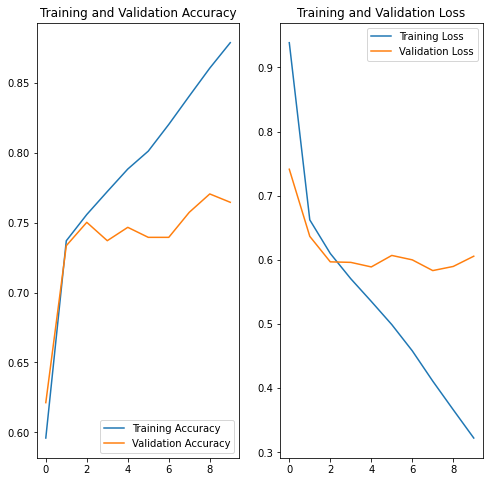

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Binary Model

In [11]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 180

In [12]:
#creating training set of raw images
binary_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'binary',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [13]:
#creating validation set of raw images
binary_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'binary',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [14]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = binary_train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', binary_val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

binary_train_ds = binary_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
binary_val_ds = binary_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs=10
history = model.fit(
  binary_train_ds,
  validation_data=binary_val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 35s 323ms/step - loss: 1.3583 - accuracy: 0.3111 - val_loss: 1.3533 - val_accuracy: 0.2963
Epoch 2/10
105/105 [==============================] - 35s 338ms/step - loss: 1.3500 - accuracy: 0.2935 - val_loss: 1.3465 - val_accuracy: 0.2963
Epoch 3/10
105/105 [==============================] - 35s 336ms/step - loss: 1.3285 - accuracy: 0.3229 - val_loss: 1.2482 - val_accuracy: 0.3309
Epoch 4/10
105/105 [==============================] - 35s 334ms/step - loss: 1.0962 - accuracy: 0.5368 - val_loss: 0.9462 - val_accuracy: 0.6081
Epoch 5/10
105/105 [==============================] - 35s 331ms/step - loss: 0.9433 - accuracy: 0.5934 - val_loss: 0.8817 - val_accuracy: 0.6165
Epoch 6/10
105/105 [==============================] - 35s 335ms/step - loss: 0.8830 - accuracy: 0.6342 - val_loss: 0.8538 - val_accuracy: 0.6476
Epoch 7/10
105/105 [==============================] - 35s 338ms/step - loss: 0.8677 - accuracy: 0.6196 - val_loss: 0.8483 - val_ac

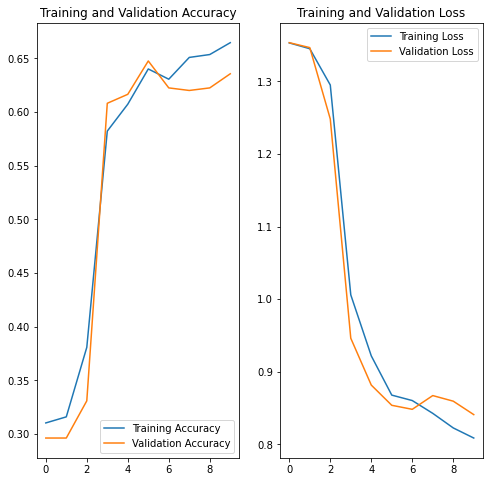

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Canny Edges Model

In [20]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 180

In [21]:
#creating training set of raw images
canny_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'canny_edges',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [22]:
#creating validation set of raw images
canny_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'canny_edges',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [23]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = canny_train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', canny_val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

binary_train_ds = binary_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
binary_val_ds = binary_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs=10
history = model.fit(
  canny_train_ds,
  validation_data=canny_val_ds,
  epochs=epochs
)

Epoch 1/10
105/105 [==============================] - 65s 585ms/step - loss: 1.1990 - accuracy: 0.4607 - val_loss: 1.0939 - val_accuracy: 0.5161
Epoch 2/10
105/105 [==============================] - 39s 366ms/step - loss: 0.9609 - accuracy: 0.5889 - val_loss: 0.9823 - val_accuracy: 0.5783
Epoch 3/10
105/105 [==============================] - 39s 366ms/step - loss: 0.8961 - accuracy: 0.6268 - val_loss: 0.9917 - val_accuracy: 0.5866
Epoch 4/10
105/105 [==============================] - 39s 369ms/step - loss: 0.8395 - accuracy: 0.6624 - val_loss: 0.9314 - val_accuracy: 0.6308
Epoch 5/10
105/105 [==============================] - 40s 373ms/step - loss: 0.7821 - accuracy: 0.6910 - val_loss: 0.9564 - val_accuracy: 0.6165
Epoch 6/10
105/105 [==============================] - 40s 373ms/step - loss: 0.7055 - accuracy: 0.7278 - val_loss: 1.0486 - val_accuracy: 0.5950
Epoch 7/10
105/105 [==============================] - 43s 404ms/step - loss: 0.6436 - accuracy: 0.7630 - val_loss: 1.0241 - val_ac

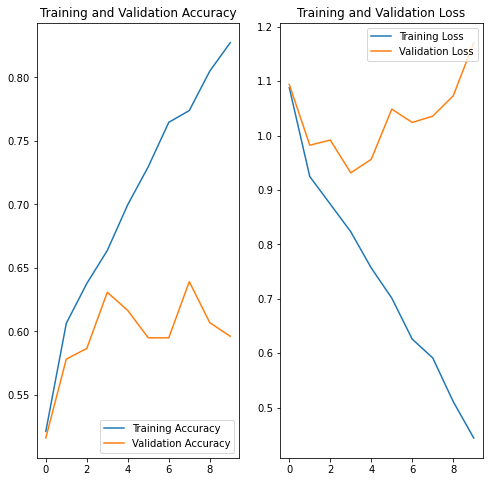

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()